In [1]:
import requests
from citipy import citipy 

# Import the API key.
from config import weather_api_key

from datetime import datetime
import numpy as np
import time
import pandas as pd

In [2]:
#Prepare Coordinates

def generateLats_longs(size):
    
    latitudes = np.random.uniform(-90,90,size)
    longitudes = np.random.uniform(-180,180,size)

    return zip(latitudes,longitudes)

In [3]:
#intialise a city series object
city_Data= []

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


coordinates=  generateLats_longs(1500)
cities =[]

for coordinate in coordinates:
    cities.append(citipy.nearest_city(coordinate[0], coordinate[1]).city_name)

print(len(cities))


for i , city in enumerate(cities):
    
     # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(city_url)
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_Data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except BaseException as e:
        print(e)        
        print("City not found. Skipping..." + city)
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# print(city_url)
print(city_Data)

Beginning Data Retrieval     
-----------------------------
1500
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=cafarnaum
Processing Record 1 of Set 1 | cafarnaum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=houma
Processing Record 2 of Set 1 | houma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=lavrentiya
Processing Record 3 of Set 1 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hobart
Processing Record 4 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sitka
Processing Record 5 of Set 1 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 6 of Set 1 | ushuaia
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=rolim+de+moura
Processing Record 3 of Set 2 | rolim de moura
'coord'
City not found. Skipping...rolim de moura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yellowknife
Processing Record 4 of Set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kungurtug
Processing Record 5 of Set 2 | kungurtug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mahebourg
Processing Record 6 of Set 2 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=barrow
Processing Record 7 of Set 2 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bethel
Processing Record 8 of Set 2 | bethel
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saint-philippe
Processing Record 4 of Set 3 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=nikolskoye
Processing Record 5 of Set 3 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=baglung
Processing Record 6 of Set 3 | baglung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=labuhan
Processing Record 7 of Set 3 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=busselton
Processing Record 8 of Set 3 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bethel
Processing Record 9 of Set 3 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vao
Processing Record 7 of Set 4 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 8 of Set 4 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vaini
Processing Record 9 of Set 4 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sao+joao+da+barra
Processing Record 10 of Set 4 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=lompoc
Processing Record 11 of Set 4 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 12 of Set 4 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee913

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mar+del+plata
Processing Record 10 of Set 5 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=nanortalik
Processing Record 11 of Set 5 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=paderborn
Processing Record 12 of Set 5 | paderborn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 13 of Set 5 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=severo-kurilsk
Processing Record 14 of Set 5 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=jalu
Processing Record 15 of Set 5 | jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

'coord'
City not found. Skipping...vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=nikolskoye
Processing Record 13 of Set 6 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=cape+town
Processing Record 14 of Set 6 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yellowknife
Processing Record 15 of Set 6 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=eenhana
Processing Record 16 of Set 6 | eenhana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=georgetown
Processing Record 17 of Set 6 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=nikolskoye
Processing Record 18 of Set 6 | nikolskoye
http://api.openweathe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=belushya+guba
Processing Record 16 of Set 7 | belushya guba
'coord'
City not found. Skipping...belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hermanus
Processing Record 17 of Set 7 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=georgetown
Processing Record 18 of Set 7 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=san+patricio
Processing Record 19 of Set 7 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=buluang
Processing Record 20 of Set 7 | buluang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=diriamba
Processing Record 21 of Set 7 | diriamba
http://api.op

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yellowknife
Processing Record 19 of Set 8 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vaini
Processing Record 20 of Set 8 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yellowknife
Processing Record 21 of Set 8 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=arraial+do+cabo
Processing Record 22 of Set 8 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=cherskiy
Processing Record 23 of Set 8 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=busselton
Processing Record 24 of Set 8 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperia

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 22 of Set 9 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=airai
Processing Record 23 of Set 9 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=leningradskiy
Processing Record 24 of Set 9 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bambous+virieux
Processing Record 25 of Set 9 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=albany
Processing Record 26 of Set 9 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=alofi
Processing Record 27 of Set 9 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=tuatapere
Processing Record 25 of Set 10 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hilo
Processing Record 26 of Set 10 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bethel
Processing Record 27 of Set 10 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=rize
Processing Record 28 of Set 10 | rize
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=maniitsoq
Processing Record 29 of Set 10 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vestmannaeyjar
Processing Record 30 of Set 10 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee91

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=taolanaro
Processing Record 27 of Set 11 | taolanaro
'coord'
City not found. Skipping...taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=lolua
Processing Record 28 of Set 11 | lolua
'coord'
City not found. Skipping...lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=broome
Processing Record 29 of Set 11 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=altamira
Processing Record 30 of Set 11 | altamira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 31 of Set 11 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=rikitea
Processing Record 32 of Set 11 | rikitea
ht

'coord'
City not found. Skipping...paradwip
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=arraial+do+cabo
Processing Record 30 of Set 12 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hobart
Processing Record 31 of Set 12 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ugoofaaru
Processing Record 32 of Set 12 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=tasiilaq
Processing Record 33 of Set 12 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=jamestown
Processing Record 34 of Set 12 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=taolanaro
Processing Record 35 of Set 12 | taolanaro
'coord'
City not

'coord'
City not found. Skipping...doctor pedro p. pena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yining
Processing Record 33 of Set 13 | yining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saskylakh
Processing Record 34 of Set 13 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=katsuura
Processing Record 35 of Set 13 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=jamestown
Processing Record 36 of Set 13 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 37 of Set 13 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hilo
Processing Record 38 of Set 13 | hilo
http://api.openweath

'coord'
City not found. Skipping...tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ankazoabo
Processing Record 36 of Set 14 | ankazoabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bluff
Processing Record 37 of Set 14 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=east+london
Processing Record 38 of Set 14 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bluff
Processing Record 39 of Set 14 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=illoqqortoormiut
Processing Record 40 of Set 14 | illoqqortoormiut
'coord'
City not found. Skipping...illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hobart
Processing R

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mar+del+plata
Processing Record 37 of Set 15 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=qaanaaq
Processing Record 38 of Set 15 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hailey
Processing Record 39 of Set 15 | hailey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sept-iles
Processing Record 40 of Set 15 | sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bardiyah
Processing Record 41 of Set 15 | bardiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=butaritari
Processing Record 42 of Set 15 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kodiak
Processing Record 39 of Set 16 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mataura
Processing Record 40 of Set 16 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=itamaraca
Processing Record 41 of Set 16 | itamaraca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kaitangata
Processing Record 42 of Set 16 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kjollefjord
Processing Record 43 of Set 16 | kjollefjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ribas+do+rio+pardo
Processing Record 44 of Set 16 | ribas do rio pardo
http://api.openweathermap.org/data/2.5/weather?uni

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=khatanga
Processing Record 43 of Set 17 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=eagle+pass
Processing Record 44 of Set 17 | eagle pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bluff
Processing Record 45 of Set 17 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saldanha
Processing Record 46 of Set 17 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=butaritari
Processing Record 47 of Set 17 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=rikitea
Processing Record 48 of Set 17 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=busselton
Processing Record 45 of Set 18 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hobart
Processing Record 46 of Set 18 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=georgetown
Processing Record 47 of Set 18 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bluff
Processing Record 48 of Set 18 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hermanus
Processing Record 49 of Set 18 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saint+anthony
Processing Record 50 of Set 18 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=cape+town
Processing Record 47 of Set 19 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vanimo
Processing Record 48 of Set 19 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=concarneau
Processing Record 49 of Set 19 | concarneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kaitangata
Processing Record 50 of Set 19 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=marcona
Processing Record 1 of Set 20 | marcona
'coord'
City not found. Skipping...marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=dikson
Processing Record 2 of Set 20 | dikson
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=nizhneyansk
Processing Record 49 of Set 20 | nizhneyansk
'coord'
City not found. Skipping...nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=torbay
Processing Record 50 of Set 20 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=georgetown
Processing Record 1 of Set 21 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ponta+do+sol
Processing Record 2 of Set 21 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 3 of Set 21 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=henties+bay
Processing Record 4 of Set 21 | henties bay
http://api.open

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=atar
Processing Record 3 of Set 22 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=busselton
Processing Record 4 of Set 22 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=raudeberg
Processing Record 5 of Set 22 | raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=marsa+matruh
Processing Record 6 of Set 22 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bella+union
Processing Record 7 of Set 22 | bella union
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=san+juan
Processing Record 8 of Set 22 | san juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=wajima
Processing Record 5 of Set 23 | wajima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=san+policarpo
Processing Record 6 of Set 23 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vestmanna
Processing Record 7 of Set 23 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=buraydah
Processing Record 8 of Set 23 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bredasdorp
Processing Record 9 of Set 23 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=qaanaaq
Processing Record 10 of Set 23 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ermelo
Processing Record 8 of Set 24 | ermelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=puerto+ayora
Processing Record 9 of Set 24 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 10 of Set 24 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 11 of Set 24 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=cherskiy
Processing Record 12 of Set 24 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yellowknife
Processing Record 13 of Set 24 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saskylakh
Processing Record 11 of Set 25 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=rikitea
Processing Record 12 of Set 25 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kapaa
Processing Record 13 of Set 25 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vaini
Processing Record 14 of Set 25 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=barbacena
Processing Record 15 of Set 25 | barbacena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=dikson
Processing Record 16 of Set 25 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=amqui
Processing Record 13 of Set 26 | amqui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vanimo
Processing Record 14 of Set 26 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mys+shmidta
Processing Record 15 of Set 26 | mys shmidta
'coord'
City not found. Skipping...mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 16 of Set 26 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=jamestown
Processing Record 17 of Set 26 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=lompoc
Processing Record 18 of Set 26 | lompoc
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=elliot+lake
Processing Record 15 of Set 27 | elliot lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=margate
Processing Record 16 of Set 27 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=safranbolu
Processing Record 17 of Set 27 | safranbolu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sioux+lookout
Processing Record 18 of Set 27 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 19 of Set 27 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=rikitea
Processing Record 20 of Set 27 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saleaula
Processing Record 19 of Set 28 | saleaula
'coord'
City not found. Skipping...saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=jamestown
Processing Record 20 of Set 28 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=tumannyy
Processing Record 21 of Set 28 | tumannyy
'coord'
City not found. Skipping...tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=araouane
Processing Record 22 of Set 28 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=destin
Processing Record 23 of Set 28 | destin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=port+alfred
Processing Record 24 of Set 2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bobo+dioulasso
Processing Record 21 of Set 29 | bobo dioulasso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=porto+walter
Processing Record 22 of Set 29 | porto walter
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kapaa
Processing Record 23 of Set 29 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=puerto+del+rosario
Processing Record 24 of Set 29 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 25 of Set 29 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=lagoa
Processing Record 26 of Set 29 | lagoa
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=inderborskiy
Processing Record 22 of Set 30 | inderborskiy
'coord'
City not found. Skipping...inderborskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vysokogornyy
Processing Record 23 of Set 30 | vysokogornyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ostrovnoy
Processing Record 24 of Set 30 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=cape+town
Processing Record 25 of Set 30 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=tiksi
Processing Record 26 of Set 30 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=klaksvik
Processing Record 27 of Set 30 | klaksvik
http://api.ope

In [4]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_Data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cafarnaum,-11.6936,-41.4683,77.38,35,8,9.57,BR,2022-09-26 20:59:44
1,Houma,29.5958,-90.7195,93.99,55,40,8.05,US,2022-09-26 20:58:11
2,Lavrentiya,65.5833,-171.0000,37.51,97,100,11.43,RU,2022-09-26 20:59:45
3,Hobart,-42.8794,147.3294,51.26,94,75,3.44,AU,2022-09-26 20:55:30
4,Sitka,57.0531,-135.3300,59.25,99,100,5.77,US,2022-09-26 20:59:46
5,Ushuaia,-54.8000,-68.3000,44.22,81,75,23.02,AR,2022-09-26 20:59:46
6,Tiznit,29.5833,-9.5000,67.86,74,91,3.31,MA,2022-09-26 20:59:46
7,Dukat,62.5500,155.5500,20.50,88,49,4.50,RU,2022-09-26 20:59:47
8,Qaanaaq,77.4840,-69.3632,24.71,77,82,6.89,GL,2022-09-26 20:59:47
9,Nikolskoye,59.7035,30.7861,46.78,93,100,2.77,RU,2022-09-26 20:55:52


In [5]:
# Reorder column for better visualisation
column_rearrange = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']


city_data_df = city_data_df[column_rearrange]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cafarnaum,BR,2022-09-26 20:59:44,-11.6936,-41.4683,77.38,35,8,9.57
1,Houma,US,2022-09-26 20:58:11,29.5958,-90.7195,93.99,55,40,8.05
2,Lavrentiya,RU,2022-09-26 20:59:45,65.5833,-171.0000,37.51,97,100,11.43
3,Hobart,AU,2022-09-26 20:55:30,-42.8794,147.3294,51.26,94,75,3.44
4,Sitka,US,2022-09-26 20:59:46,57.0531,-135.3300,59.25,99,100,5.77
...,...,...,...,...,...,...,...,...,...
1368,Bambous Virieux,MU,2022-09-26 21:36:57,-20.3428,57.7575,71.85,64,40,11.50
1369,Sistranda,NO,2022-09-26 21:36:57,63.7256,8.8340,53.56,72,100,21.54
1370,Nikolskoye,RU,2022-09-26 21:36:58,59.7035,30.7861,48.09,94,100,2.75
1371,Ribeira Grande,PT,2022-09-26 21:36:58,38.5167,-28.7000,68.40,77,75,13.80


In [6]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

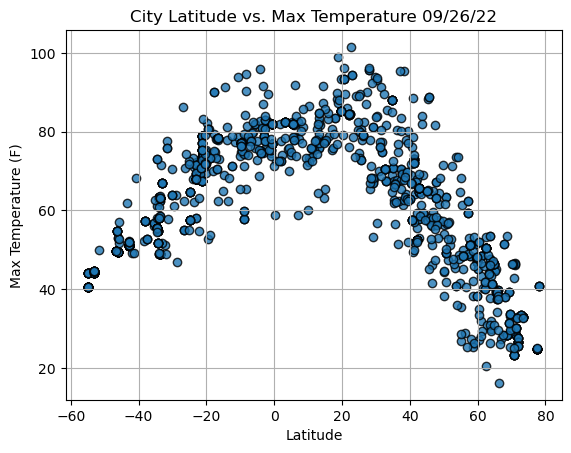

In [8]:
# Import time module
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress

# # Perform linear regression.(independent var, dependent variable)
# (slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
# # y= mx+c 
# reg_line = [(slope*lat + intercept) for lat in lats ] 


# # Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
# print(f"The p-value is: {p_value:.3f}")
# print(linregress(lats, max_temps))


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# plt.plot(lats, reg_line,"r")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.annotate(line_eq,(-60,40))

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()






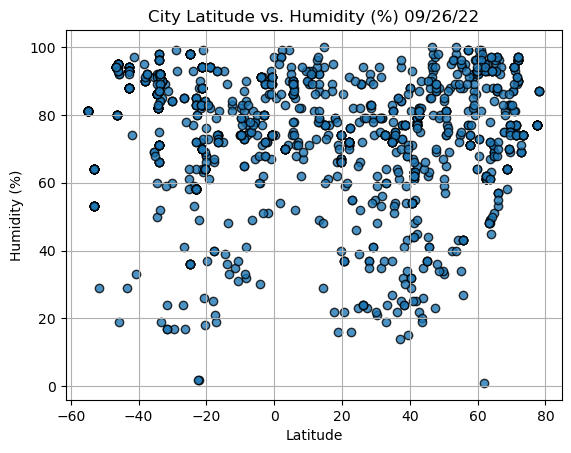

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

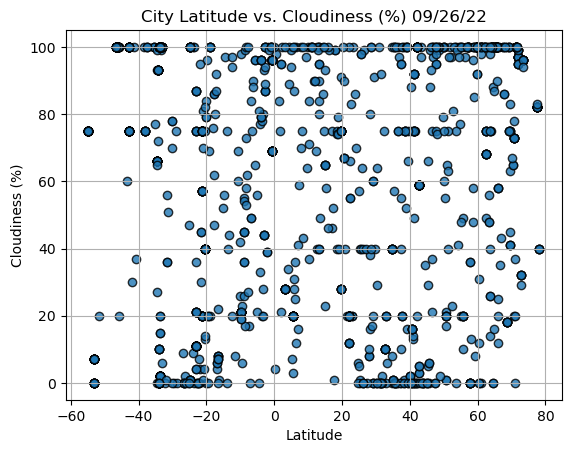

In [10]:
plt.scatter(lats,
            cloudiness,
            edgecolor ="black" ,linewidths =1,marker='o',
            alpha=0.8, label ="Cities"
            )


plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

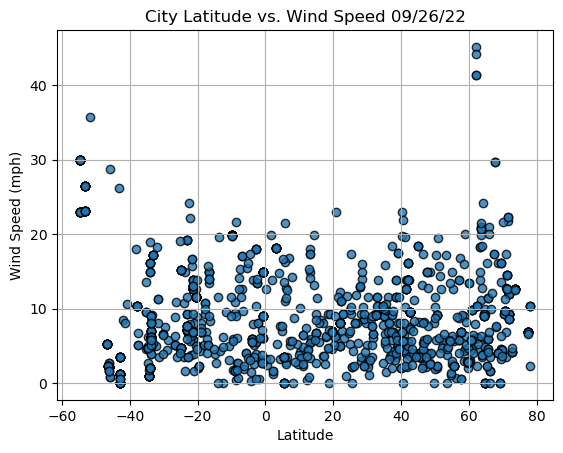

In [11]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Create a Linear Regression Function

In [12]:
# No x_label is passed beacuse this project involves one independent variable thats Latitide.


def plot_linear_regression(x_values, y_values,title,y_label,title_index, file_ouput ):
    # Import time module
    import time
    import matplotlib.pyplot as plt
    from scipy.stats import linregress

    # Perform linear regression.(independent var, dependent variable)
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # y= mx+c 
    reg_line = [(slope*lat + intercept) for lat in x_values ] 


    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    print(f"The p-value is: {p_value:.3f}")
    print(linregress(x_values, y_values))

    # Build the scatter plot for latitude vs. max temperature.
    plt.scatter(x_values,
                y_values,
                edgecolor="black", linewidths=1, marker="o",
                alpha=0.8, label="Cities")

    plt.plot(x_values, reg_line,"r")


    # Incorporate the other graph properties.
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel("Latitude")
    plt.grid(True)
    plt.annotate(line_eq,title_index,fontsize =15, color ='Red')

    # Save the figure.
    plt.savefig(f"weather_data/Fig"+ file_ouput + ".png")

    # Show plot.
    plt.show()


# Create the Northern and Southern Hemisphere data frames

In [13]:
northern_hem_lats =[]
# for lat in city_data_df["Lat"]:
#     if(lat >= 0):
#         northern_hem_lats.append(lat)

# plot_linear_regression(x_values, y_values,title,y_label,title_index )
        
    
northern_hem_lats = city_data_df.loc[city_data_df["Lat"] >= 0]

southern_hem_lats = city_data_df.loc[city_data_df["Lat"] < 0]



# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere and southern hemisphere

y = -0.82x + 94.99
The p-value is: 0.000
LinregressResult(slope=-0.8198862290752038, intercept=94.98924662827521, rvalue=-0.86618155342992, pvalue=3.381971704107537e-218, stderr=0.01766525950904977, intercept_stderr=0.8508301643457928)


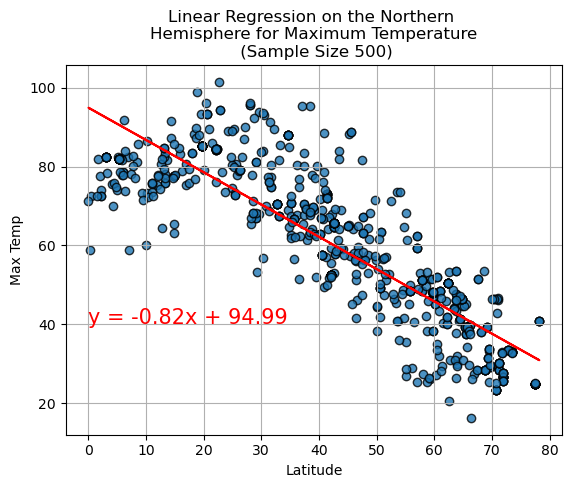

City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [14]:
# Linear regression on the Northern Hemisphere
# Call the function

plot_linear_regression(northern_hem_lats["Lat"],
                       northern_hem_lats["Max Temp"],
                       'Linear Regression on the Northern \nHemisphere for Maximum Temperature\n (Sample Size 500)',
                       'Max Temp',
                       (0,40),
                        'LatvsTempLinRegNorth')

northern_hem_lats.dtypes

y = 0.74x + 84.07
The p-value is: 0.000
LinregressResult(slope=0.7435849659769319, intercept=84.06804790472846, rvalue=0.8899583076284232, pvalue=1.6451211888811137e-224, stderr=0.014922510168334268, intercept_stderr=0.4758801646872115)


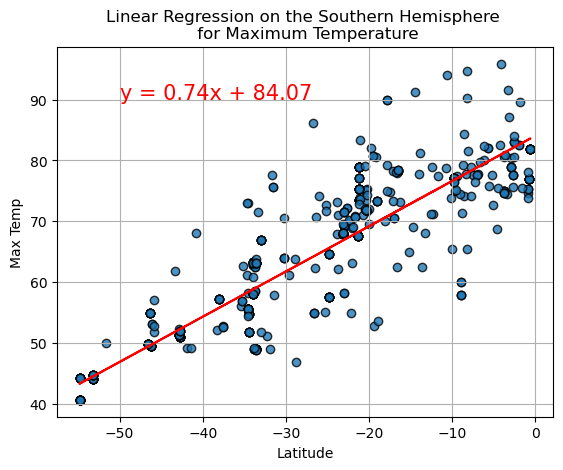

In [15]:
# Linear regression on the Southern Hemisphere
# Call the function.


plot_linear_regression(southern_hem_lats["Lat"], southern_hem_lats["Max Temp"],
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (-50,90),
                        "LatvsTempLinRegSouth")

## Perform Linear Regression on the Percent Humidity for the Northern
## and Southern Hemisphere

y = 0.1x + 69.05
The p-value is: 0.002
LinregressResult(slope=0.10355025800975202, intercept=69.0500786715563, rvalue=0.11643628246226145, pvalue=0.0017638753264389885, stderr=0.03298672382172203, intercept_stderr=1.588773696536244)


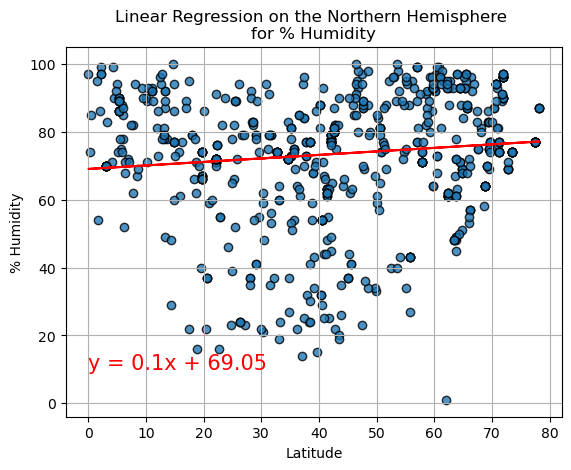

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hem_lats["Lat"]
y_values = northern_hem_lats["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity',
                       (0,10),
                        "LatVsHumLinRegNorth")

y = -0.21x + 71.15
The p-value is: 0.000
LinregressResult(slope=-0.20879803160639002, intercept=71.1450731537626, rvalue=-0.18376375036340098, pvalue=2.236115334689202e-06, stderr=0.043740446714439524, intercept_stderr=1.3948867014431519)


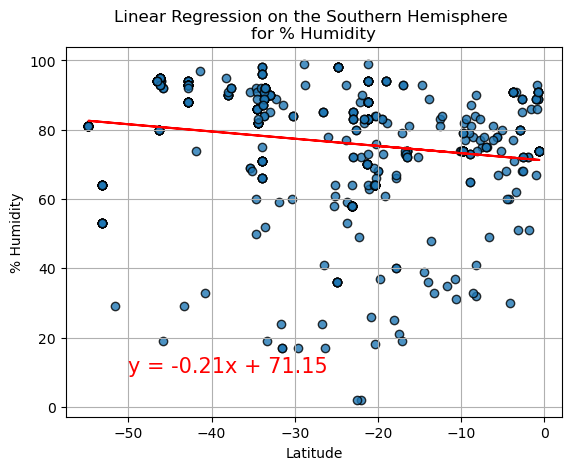

In [17]:
# Linear regression on the Northern Hemisphere
x_values = southern_hem_lats["Lat"]
y_values = southern_hem_lats["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                       '% Humidity',
                       (-50,10),
                        "LatVsHumLinRegSouth")

## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

y = 0.45x + 40.78
The p-value is: 0.000
LinregressResult(slope=0.45034189781816264, intercept=40.77669915083397, rvalue=0.25251244943347767, pvalue=6.385211811480581e-12, stderr=0.06444555805358633, intercept_stderr=3.1039580665089628)


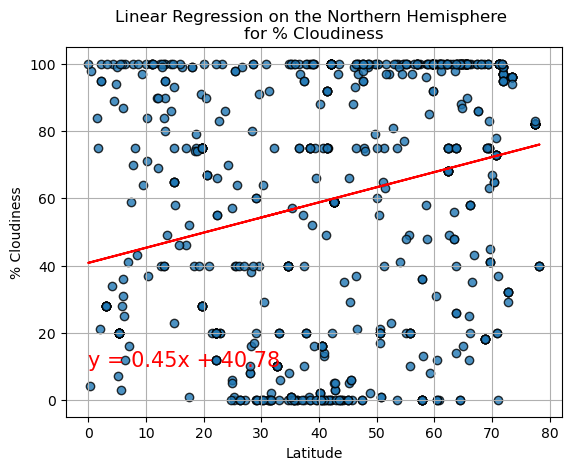

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hem_lats["Lat"]
y_values = northern_hem_lats["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',
                       (0,10),
                        "LatVsCloudLinRegNorth")

y = -0.25x + 48.22
The p-value is: 0.011
LinregressResult(slope=-0.24733460634991183, intercept=48.219463807178606, rvalue=-0.09914329679903297, pvalue=0.011185937039297144, stderr=0.09721935752281873, intercept_stderr=3.100333881287493)


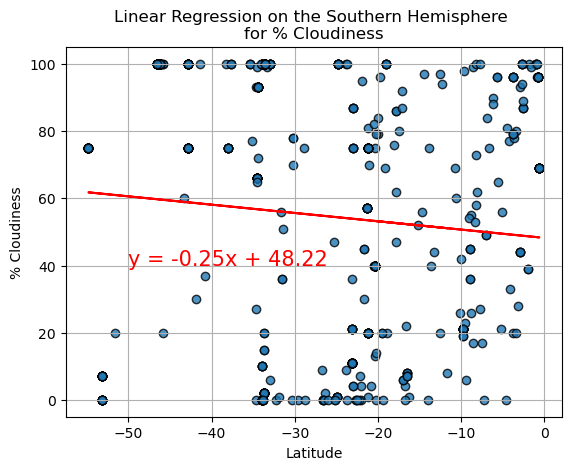

In [22]:
# Linear regression on the Northern Hemisphere
x_values = southern_hem_lats["Lat"]
y_values = southern_hem_lats["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',
                       (-50,40),
                        "LatVsCloudLinRegSouth")

## Perform Linear Regression on the Wind Speed for the Northern and Southern Hemisphere

y = 0.02x + 7.45
The p-value is: 0.024
LinregressResult(slope=0.022936464082988117, intercept=7.452255079760448, rvalue=0.08436653518728988, pvalue=0.023677795061205983, stderr=0.010116855744713252, intercept_stderr=0.48726858677209844)


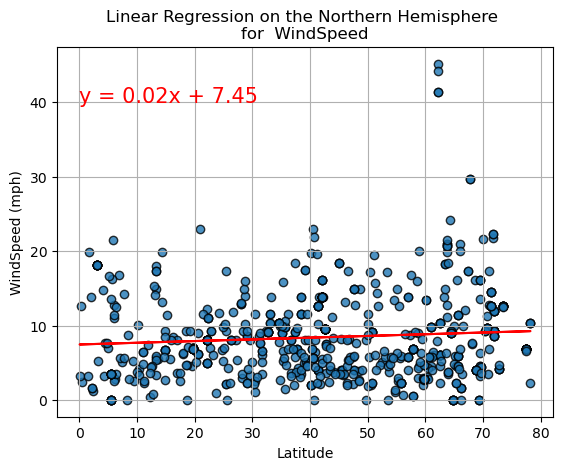

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hem_lats["Lat"]
y_values = northern_hem_lats["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor  WindSpeed',
                       'WindSpeed (mph)',
                       (0,40),
                        "LatVsWindSpeedinRegNorth")

y = -0.11x + 6.43
The p-value is: 0.000
LinregressResult(slope=-0.11160745731193922, intercept=6.428781682932879, rvalue=-0.21929477774603048, pvalue=1.4573907725589152e-08, stderr=0.019446391534249246, intercept_stderr=0.6201471402263099)


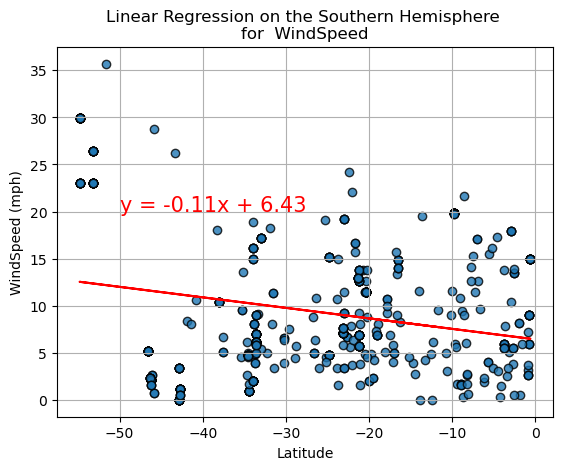

In [21]:
# Linear regression on the Northern Hemisphere
x_values = southern_hem_lats["Lat"]
y_values = southern_hem_lats["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor  WindSpeed',
                       'WindSpeed (mph)',
                       (-50,20),
                        "LatVsWindSpeedinRegSouth")